# 2クラス問題のconfusion matrix

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [6]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [7]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
clf.score(X_test, y_test)

0.95614035087719296

In [9]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [13]:
np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)

(47, 67)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
conf_mat = np.zeros( [2,2] )

In [17]:
for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] += 1

In [18]:
print(conf_mat)

[[ 46.   1.]
 [  4.  63.]]


In [20]:
import pandas as pd
df = pd.DataFrame(conf_mat, columns=["pred 0", "pred 1"], index=["true 0", "true 1"])

In [21]:
df

,pred 0,pred 1
true 0,46.0,1.0
true 1,4.0,63.0


In [22]:
df

,pred 0,pred 1
true 0,46.0,1.0
true 1,4.0,63.0


In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
accuracy_score(y_test, y_pred)

0.95614035087719296

In [26]:
cmat = confusion_matrix(y_test, y_pred)

In [27]:
cmat

array([[46,  1],
       [ 4, 63]])

# 2クラス問題で重用なTP, TN, FP, FN

In [28]:
cmat

array([[46,  1],
       [ 4, 63]])

In [31]:
TP = cmat[0, 0]

In [34]:
TN = cmat[1,1]

In [36]:
FP = cmat[1, 0]

In [37]:
FN = cmat[0,1]

In [38]:
FN

1

# 多クラス問題のconfusion matrix

In [40]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

img = data.images

In [41]:
X[0].shape

(64,)

In [43]:
img[0].shape

(8, 8)

(-0.5, 7.5, 7.5, -0.5)

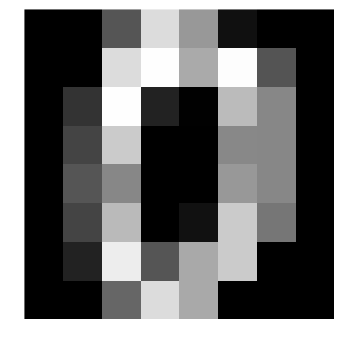

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray()
plt.imshow(img[0], interpolation='none')
plt.axis('off')

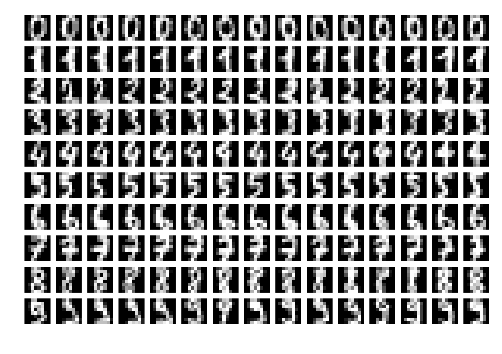

In [45]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(0, 15):
        plt.subplot(10, 15, i*15 + j + 1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [46]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [48]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
clf.score(X_test, y_test)

0.96944444444444444

In [51]:
y_pred = clf.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.96944444444444444

In [53]:
conf_mat = confusion_matrix(y_test, y_pred)

In [54]:
df = pd.DataFrame(conf_mat)

In [55]:
df

,0,1,2,3,4,5,6,7,8,9
0,30,0,0,0,0,0,0,0,0,0
1,0,37,0,0,0,0,0,0,1,0
2,0,0,39,0,0,0,0,0,0,0
3,0,0,0,45,0,0,0,0,1,1
4,0,0,0,0,29,0,0,0,0,0
5,0,0,0,0,0,39,0,1,0,0
6,0,0,0,0,0,0,32,0,0,0
7,0,0,0,0,0,0,0,33,1,1
8,0,3,0,1,0,0,0,0,40,0
9,0,0,0,0,0,0,0,1,0,25


In [56]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=True)

In [57]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

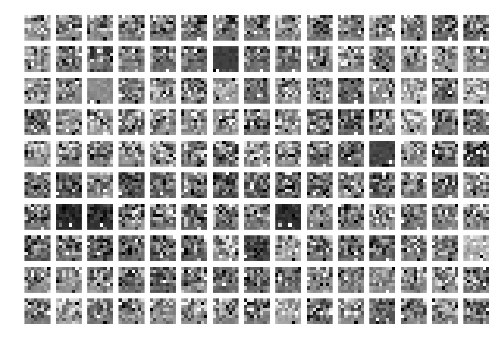

In [62]:
for i in range(10):
    i_th_digit = X_train_pca[y_train == i]
    for j in range(0, 15):
        plt.subplot(10, 15, i*15 + j + 1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [58]:
clf.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
clf.score(X_test_pca, y_test) # 目視ではわからないのに特徴が変換されているらしい

0.96666666666666667

In [65]:
X_train_zca = X_train_pca.dot(pca.components_)
X_test_zca = X_test_pca.dot(pca.components_)

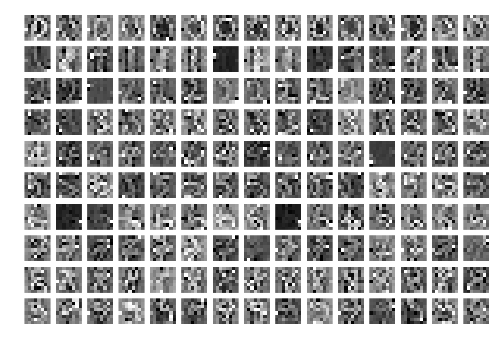

In [66]:
for i in range(10):
    i_th_digit = X_train_zca[y_train == i]
    for j in range(0, 15):
        plt.subplot(10, 15, i*15 + j + 1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [68]:
clf.fit(X_train_zca, y_train)
clf.score(X_test_zca, y_test)

0.96666666666666667

# PCAで文字認識

In [72]:
scores = []
for i in range(1, 65):
    clf.fit(X_train_pca[:, 0:i], y_train) # 使う次元を変えてやってみる
    score = clf.score(X_test_pca[:, 0:i], y_test)
    print(i, score)
    scores.append(score)
    
scores = np.array(scores)

1 0.358333333333
2 0.558333333333
3 0.661111111111
4 0.758333333333
5 0.808333333333
6 0.808333333333
7 0.855555555556
8 0.877777777778
9 0.916666666667
10 0.922222222222
11 0.936111111111
12 0.938888888889
13 0.947222222222
14 0.944444444444
15 0.944444444444
16 0.95
17 0.955555555556
18 0.952777777778
19 0.955555555556
20 0.958333333333
21 0.952777777778
22 0.961111111111
23 0.961111111111
24 0.961111111111
25 0.963888888889
26 0.961111111111
27 0.961111111111
28 0.961111111111
29 0.961111111111
30 0.966666666667
31 0.963888888889
32 0.961111111111
33 0.961111111111
34 0.961111111111
35 0.961111111111
36 0.961111111111
37 0.955555555556
38 0.961111111111
39 0.958333333333
40 0.963888888889
41 0.966666666667
42 0.963888888889
43 0.966666666667
44 0.969444444444
45 0.966666666667
46 0.966666666667
47 0.963888888889
48 0.966666666667
49 0.963888888889
50 0.963888888889
51 0.961111111111
52 0.961111111111
53 0.963888888889
54 0.963888888889
55 0.963888888889
56 0.963888888889
57 0.963888

(0.9, 1)

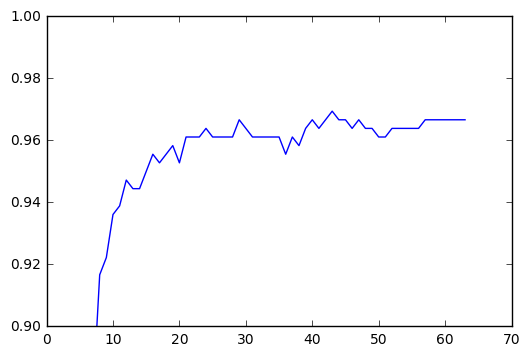

In [73]:
plt.plot(scores)
plt.ylim(0.9, 1)

# precision と recall

In [74]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [77]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [78]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94736842105263153

In [79]:
y_pred = clf.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred)

0.94736842105263153

In [86]:
cmat = confusion_matrix(y_test, y_pred)

In [87]:
cmat

array([[43,  3],
       [ 3, 65]])

In [91]:
cmat.sum(), cmat.diagonal().sum(), cmat.diagonal().sum() / cmat.sum()

(114, 108, 0.94736842105263153)

In [92]:
TP = cmat[0,0]
TN = cmat[1,1]
FP = cmat[1,0]
FN = cmat[0,1]

TP, TN, FP, FN

(43, 65, 3, 3)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.9348    0.9348    0.9348        46
          1     0.9559    0.9559    0.9559        68

avg / total     0.9474    0.9474    0.9474       114



In [96]:
# recall:再現率(= 実際にPositive なものをどれくらいPositiveと判定できたか？)
recall_0 = TP / (TP + FN)
recall_0

0.93478260869565222

In [99]:
# precision:適合度(= Positive と判定した中で、合っていた割合
precision_0 = TP / (TP + FP)
precision_0

0.93478260869565222

# f-measure, f値

In [100]:
# f値：recallとprecisionのどちらもいいですか？の指標


In [101]:
f1_0 = 2 * recall_0 * precision_0 / \
    (recall_0 + precision_0)
    # = 2 / (1/recall + 1/precision)
    
f1_0

0.93478260869565222

In [102]:
from sklearn.metrics import f1_score

In [103]:
f1_score(y_test, y_pred, pos_label=0)

0.93478260869565222

# precision, recall, f-measureをいっぺんに

In [106]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, beta=1)

(array([ 0.93478261,  0.95588235]),
 array([ 0.93478261,  0.95588235]),
 array([ 0.93478261,  0.95588235]),
 array([46, 68]))

↑precision, recall, f-measure, supportの順番

# 多クラス分類のprecision, recall

In [107]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

In [108]:
from sklearn.cross_validation import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [110]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
clf.score(X_test, y_test)

0.9555555555555556

In [113]:
y_pred = clf.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [115]:
confusion_matrix(y_test, y_pred)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  1,  2,  0],
       [ 0,  2,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 38,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 30]])

In [117]:
print(classification_report(y_test, y_pred, digits=4))
# 1, 8 が足をひっぱっているので、これを識別できるように特徴量をつくる

             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        39
          1     0.8529    0.9667    0.9062        30
          2     0.9750    1.0000    0.9873        39
          3     0.9714    0.9189    0.9444        37
          4     1.0000    0.9512    0.9750        41
          5     0.9268    0.9500    0.9383        40
          6     0.9730    0.9730    0.9730        37
          7     0.9697    1.0000    0.9846        32
          8     0.8750    0.9032    0.8889        31
          9     1.0000    0.8824    0.9375        34

avg / total     0.9577    0.9556    0.9558       360



# ROC, AUC

In [118]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.08)

In [123]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
y_pred = clf.predict(X_test)

In [125]:
clf.decision_function(X_test[12:15])

array([ 16.41152925,  31.45985552, -36.504646  ])

In [126]:
clf.predict(X_test[12:15])

array([1, 1, 0])

In [132]:
for th in range(0, 20):
    print(th, (clf.decision_function(X_test[12:15]) > th).astype(int))

0 [1 1 0]
1 [1 1 0]
2 [1 1 0]
3 [1 1 0]
4 [1 1 0]
5 [1 1 0]
6 [1 1 0]
7 [1 1 0]
8 [1 1 0]
9 [1 1 0]
10 [1 1 0]
11 [1 1 0]
12 [1 1 0]
13 [1 1 0]
14 [1 1 0]
15 [1 1 0]
16 [1 1 0]
17 [0 1 0]
18 [0 1 0]
19 [0 1 0]


In [133]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
test_score = clf.decision_function(X_test)

fpr, tpr, th = roc_curve(y_test, test_score)

AUC = 0.9600858636137382


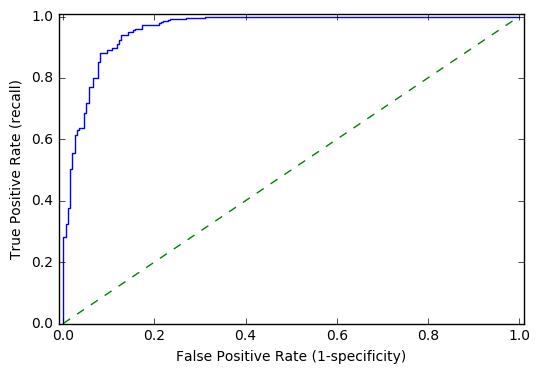

In [140]:
plt.plot(fpr, tpr)
print("AUC = {}".format(auc(fpr, tpr)))

plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel("True Positive Rate (recall)")
plt.xlabel("False Positive Rate (1-specificity)")

# ランダムならどうなるROC

In [141]:
# 動画を見るのみ

# average precision